# 06 Sampling from Rasters

It may be important for some tasks to sample values of a raster at a certain point, e.g. an orientation measurement. The functionality to sample from an array or rasterio object directly or random sampling has been implemented in GemGIS and will be introduced here. 

<img src="../images/tutorial06_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/06_sampling_from_rasters/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="06_sampling_from_rasters.zip", dirpath=file_path)

## Loading the raster

In [3]:
import rasterio
import numpy as np

raster = rasterio.open(file_path + 'raster.tif')

## Plotting the raster

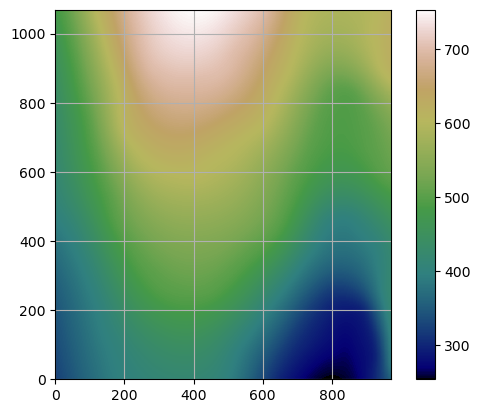

In [4]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap='gist_earth',extent = [0, 972, 0, 1069])
plt.grid()
plt.colorbar(im)

## Sampling from Array

The function ``gg.raster.sample_from_array(..)`` will be used to sample a single point or given lists/arrays of coordinates from an array.

Sampling from one given point. 

In [5]:
sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = 500,
                                     point_y = 500)

sample

562.0227

Sampling from given lists of x and y coordinates.

In [6]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = point_x,
                                     point_y = point_y)

sample

array([378.79877, 435.21704, 505.29126, 541.74146, 562.0227 ],
      dtype=float32)

Sampling from given arrays of x and y coordinates.

In [7]:
point_x = np.array([100, 200, 300, 400 ,500.])
point_y = np.array([100, 200, 300, 400 ,500.])

sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = point_x,
                                     point_y = point_y)

sample

array([378.79877, 435.21704, 505.29126, 541.74146, 562.0227 ],
      dtype=float32)

## Sampling from Raster

The function ``gg.raster.sample_from_raster(..)`` will be used to sample a single point or given lists/arrays of coordinates from raster.

Sampling from one given point.

In [8]:
sample = gg.raster.sample_from_rasterio(raster = raster,
                                        point_x = 500,
                                        point_y = 500)

sample

561.646728515625

Sampling from given lists of x and y coordinates.

In [9]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

sample = gg.raster.sample_from_rasterio(raster = raster,
                                        point_x = point_x,
                                        point_y = point_y)

sample

[376.72430419921875,
 435.217041015625,
 505.291259765625,
 540.6767578125,
 561.646728515625]

Sampling from given arrays of x and y coordinates.

In [10]:
point_x = np.array([100, 200, 300, 400 ,500.])
point_y = np.array([100, 200, 300, 400 ,500.])

sample = gg.raster.sample_from_rasterio(raster = raster,
                                        point_x = point_x,
                                        point_y = point_y)

sample

[376.72430419921875,
 435.217041015625,
 505.291259765625,
 540.6767578125,
 561.646728515625]

## Sample Randomly from Raster

The function ``gg.raster.sample_randomly(..)`` will be used to sample one or multiple points from an array or a raster.

Sample one point randomly from raster.

In [11]:
sample = gg.raster.sample_randomly(raster=raster,
                                   n=1)

sample

(559.26953125, [315.92081696676496, 479.1266134083539])

Sample multiple points randomly from raster.

In [12]:
sample = gg.raster.sample_randomly(raster=raster,
                                   n=5)

sample

([349.976806640625,
  593.2823486328125,
  469.182861328125,
  517.493896484375,
  457.33819580078125],
 [array([656.19476672, 428.41935331, 398.478624  , 419.74758082,
         117.59572753]),
  array([148.35611075, 563.45782055, 165.23874243, 307.06250898,
         453.00801777])])

## Sample Randomly from Array
Sample one point randomly from array.

In [13]:
sample = gg.raster.sample_randomly(raster=raster.read(1),
                                   n=1,
                                   extent=[0, 972, 0, 1069])

sample

(410.9246826171875, [231.80451313385362, 47.36589009664959])

Sample multiple points randomly from array.

In [14]:
sample = gg.raster.sample_randomly(raster=raster.read(1),
                                   n=5,
                                   extent=[0, 972, 0, 1069])

sample

([292.591064453125,
  608.958740234375,
  604.081298828125,
  482.37969970703125,
  617.5330810546875],
 [array([758.6160817 , 617.25201554, 479.26358106,  60.94460541,
         489.87045745]),
  array([128.41568426, 788.7398796 , 644.85742373, 799.84713491,
         692.40925628])])

## Plotting the points on the raster

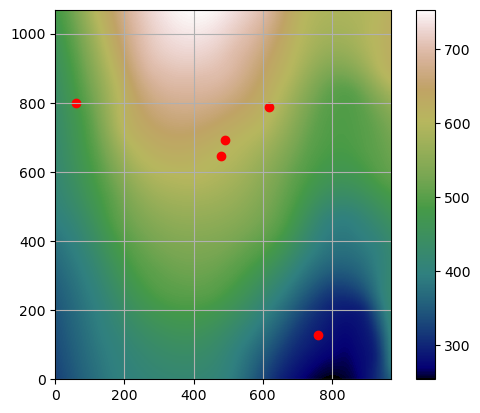

In [15]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap='gist_earth',extent = [0, 972, 0, 1069])
plt.scatter(sample[1][0], sample[1][1], color='red')
plt.grid()
plt.colorbar(im)

## Sampling slope and aspect values

In a same way, slope and aspect values can be sampled from a raster when using ``calculate_slope(..)`` and ``calculate_hillshades(..)``.